In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
train_df = pd.read_csv('data/train_split.csv')
val_df = pd.read_csv('data/valid_split.csv')
train_df.head()

,Filename,Admiration,Amusement,Determination,Empathic Pain,Excitement,Joy
0,0,0.333333,0.333333,0.0,0.0,0.333333,0.0
1,1,0.000000,0.000000,0.0,0.0,0.500000,0.0
2,2,0.500000,0.000000,0.0,0.0,0.000000,0.0
3,3,0.000000,0.000000,0.5,0.0,0.000000,0.0
4,4,0.400000,0.000000,0.0,0.0,0.200000,0.4


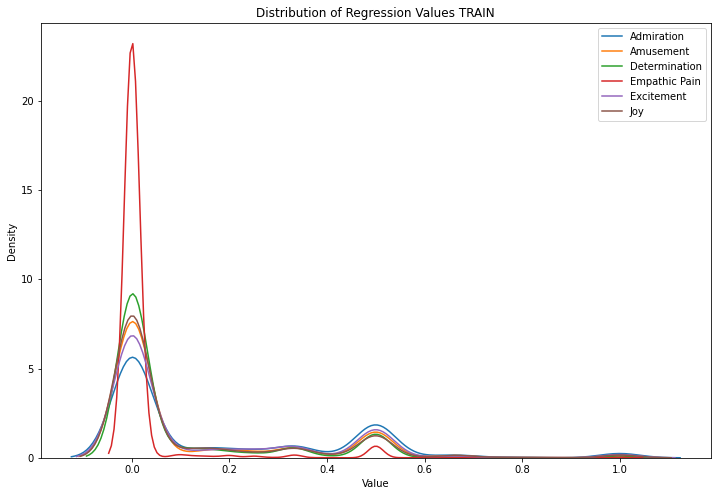

In [12]:
plt.figure(figsize=(12, 8))
for label in train_df.columns:
    if label != 'Filename':
        sns.kdeplot(train_df[label], label=label)

plt.title('Distribution of Regression Values TRAIN')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

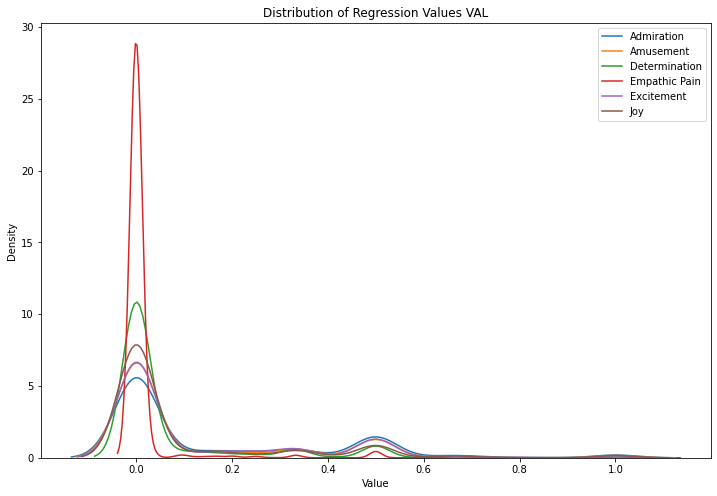

In [13]:
plt.figure(figsize=(12, 8))
for label in val_df.columns:
    if label != 'Filename':
        sns.kdeplot(val_df[label], label=label)

plt.title('Distribution of Regression Values VAL')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()